In [1]:
import h5py
import numpy as np
import meshio

import matplotlib.pyplot as plt

#Set fonts
from matplotlib import rc, rcParams, cm
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Arial']})

In [2]:
# Plotting function
def PlotLine(y = 2*56.25/25.4, x = 1.5*56.25/25.4, dpi=100):
    fig, ax = plt.subplots(figsize=(y, x), dpi=dpi, tight_layout=True)
    return ax

In [3]:
def getTopY_DOFs(mesh, ly, nDim):
    
    topY_DOFs = []

    # Number of nodes
    nNodes = mesh.points.shape[0]  
    # Node coordinates
    nodeCoord = mesh.points

    for iNod in range(nNodes):
        # top nodes
        if nodeCoord[iNod][1]==ly:
            topY_DOFs.append(nDim*iNod + 1)
    
    return topY_DOFs

In [4]:
# Read nodes and node coordinate from mesh file
mesh = meshio.read("SENT.msh")

In [21]:
dofyt = int(2*5+1)
dofyb = int(2*2+1)

nSteps = 400
topY_DOFs = getTopY_DOFs(mesh, 52e-3, 2)
force_y = np.zeros((nSteps))
disp_y = np.zeros((nSteps))
CMOD = np.zeros((nSteps))

In [18]:
SimulName = "SENT_EPTH"

with h5py.File(SimulName+".mech.out.hdf5", "a") as fh5:
    
    for iStep in range(nSteps):
        
        force_y[iStep] = fh5["Force/Step_"+str(iStep)][()][topY_DOFs].sum()*12.5e-3
        disp_y[iStep] = fh5["Disp/Step_"+str(iStep)][()][topY_DOFs].sum()/len(topY_DOFs)
        yt = fh5["Disp/Step_"+str(iStep)][()][dofyt]
        yb = fh5["Disp/Step_"+str(iStep)][()][dofyb]
        CMOD[iStep] = yt-yb


Text(0, 0.5, 'Force (kN)')

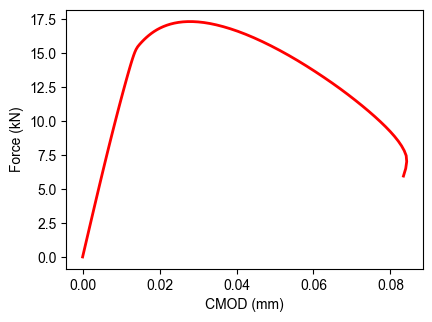

In [19]:
ax = PlotLine()

ax.plot(CMOD*1000, force_y/1000,"r", lw=2)

ax.set_xlabel("CMOD (mm)")
ax.set_ylabel("Force (kN)")

# plt.savefig("F_CMOD.svg", transparent=True)

Text(0, 0.5, 'Force (kN)')

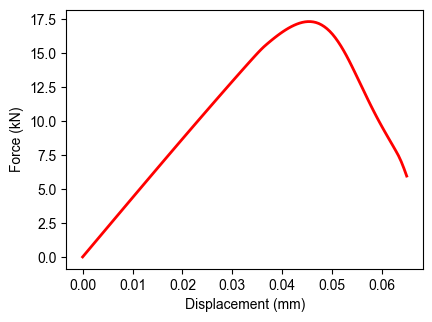

In [20]:
ax = PlotLine()

ax.plot(disp_y*1000, force_y/1000,"r", lw=2)

ax.set_xlabel("Displacement (mm)")
ax.set_ylabel("Force (kN)")